In [46]:
import numpy as np
import matplotlib.pyplot as plt
from qbstyles import mpl_style

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

mpl_style(dark=True)

In [36]:
class MyDataset(Dataset):
    def __init__(self, samples, targets):
        self.samples = samples
        self.targets = targets
    
    def __getitem__(self, index):
        return self.samples[index], self.targets[index]
    
    def __len__(self):
        return len(self.samples)


class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)
    
    def fit(self, train_loader, epochs=100, lr=0.01):
        criterion = nn.MSELoss()
        optimizer = optim.SGD(self.parameters(), lr=lr)
        
        for epoch in range(epochs):
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = self.forward(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
    
    def predict(self, inputs):
        with torch.no_grad():
            return self.forward(inputs).numpy()

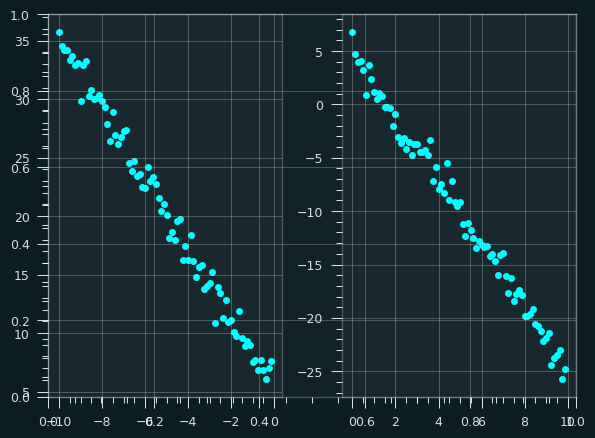

In [43]:
X = torch.arange(-10, 10, 0.125)
Y = -3 * X + 5
noise = torch.randn(X.shape)
Y += noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=False)

dataset = MyDataset(X, Y)
trainset = MyDataset(X_train, Y_train)
testset = MyDataset(X_test, Y_test)

trainloader = DataLoader(trainset, batch_size=1)
testloader = DataLoader(testset)

fig, (trainplt, testplt) = plt.subplots(nrows=1, ncols=2)

trainplt.scatter(X_train, Y_train, color="cyan")
testplt.scatter(X_test, Y_test, color="cyan")
fig.tight_layout()

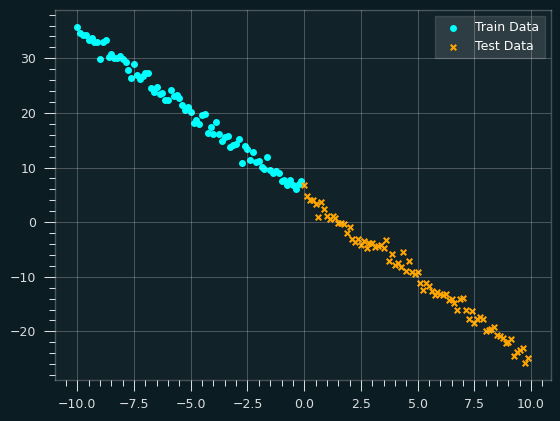

In [44]:
plt.scatter(X_train, Y_train, color="cyan", label="Train Data", marker="o")
plt.scatter(X_test, Y_test, color="orange", label="Test Data", marker="x")
plt.legend()

In [91]:
epoch = 10
train_losses = []
test_losses = []
learning_rates = [0.001, 0.002, 0.005, 0.01, 0.02]
for lr in learning_rates:
    model = MyModel(input_size=1, output_size=1)
    model.fit(trainloader, epochs=epoch, lr=lr)
    
    train_preds = model.predict(X_train.unsqueeze(1))
    test_preds = model.predict(X_test.unsqueeze(1))
    
    train_loss = mean_squared_error(Y_train.numpy(), train_preds)
    test_loss = mean_squared_error(Y_test.numpy(), test_preds)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

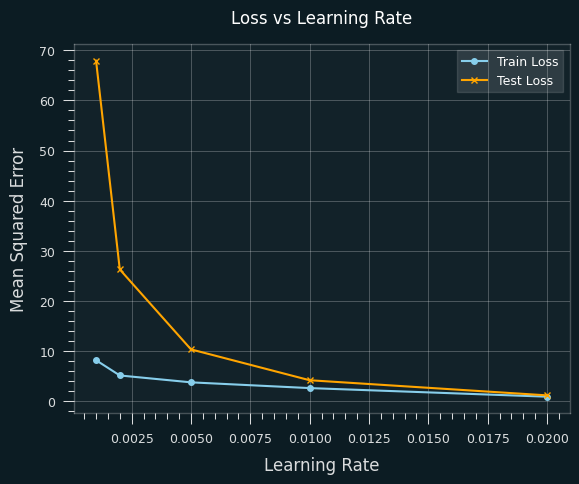

In [92]:
plt.title("Loss vs Learning Rate")
plt.plot(learning_rates, train_losses, label="Train Loss", marker='o', color='skyblue')
plt.plot(learning_rates, test_losses, label="Test Loss", marker='x', color='orange')
# plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [93]:
for lr, train_loss, test_loss in zip(learning_rates, train_losses, test_losses):
    print(f"{lr} {train_loss:.2f} {test_loss:.2f}")

0.001 8.19 67.92
0.002 5.16 26.29
0.005 3.78 10.36
0.01 2.64 4.21
0.02 0.92 1.19
